# Problem Statement, Imports and Datset

## Problem Statement

### Problem Statement

Jamboree, a leading test preparation and admissions counseling company, has recently introduced a feature on their website that allows students to estimate their probability of gaining admission to Ivy League colleges. This feature is tailored to reflect the admissions landscape from an Indian perspective, helping students gauge their chances based on their academic and extracurricular profiles.

To enhance this tool, Jamboree seeks to better understand the key factors that influence graduate admissions. The objective of this analysis is twofold: first, to identify and analyze the factors that significantly impact admissions decisions, and second, to develop a predictive model that accurately estimates a student's chances of admission based on these factors.


### How can you help here?

Your analysis will provide Jamboree with insights into the importance of various factors, such as GRE scores, TOEFL scores, CGPA, research experience, and more. Additionally, it will explore how these factors are interrelated and how they collectively influence the likelihood of admission. The results of this study will be crucial in refining Jamboree's admissions prediction tool and in guiding students toward improving their profiles to increase their chances of acceptance into top graduate programs.


## Imports

**EDA Imports**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats

**Linear Regression Imports**

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Dataset

In [3]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Column Profiling

| Column Name                                                   | Data Type | Description                                                                 |
|---------------------------------------------------------------|-----------|-----------------------------------------------------------------------------|
| **Serial No.**                                                | Integer   | Unique row identifier.                                                      |
| **GRE Scores**                                                | Integer   | GRE scores, ranging from 0 to 340.                                          |
| **TOEFL Scores**                                              | Integer   | TOEFL scores, ranging from 0 to 120.                                        |
| **University Rating**                                         | Integer   | Rating of the university, ranging from 1 to 5.                              |
| **Statement of Purpose Strength**                             | Integer   | Strength of SOP, ranging from 1 to 5.                               |
| **Letter of Recommendation Strength**                         | Integer   | Strength of LOR, ranging from 1 to 5.                               |
| **Undergraduate GPA**                                         | Float     | Undergraduate GPA, ranging from 0 to 10.                                    |
| **Research Experience**                                       | Binary    | Indicates whether the candidate has research experience (0 = No, 1 = Yes).  |
| **Chance of Admit**                                           | Float     | Probability of admission, ranging from 0 to 1.                              |


# EDA

## Basic Checks

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# dropping serial number
df.drop(['Serial No.'], axis=1, inplace=True)

In [6]:
df.shape

(500, 8)

In [7]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Some column name has trailing/leading spaces

In [10]:
df.rename(columns= {"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace=True)

1. 500 rows/samples.
2. 8 columns
    - 7 features: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']
    - 1 Target: 'Chance of Admit '
3. No Missing values.
4. No Duplicates.
5. Every column is numeric. (No need of Encoding)

## EDA plots

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

### Univariate Analysis and Outliers Detection

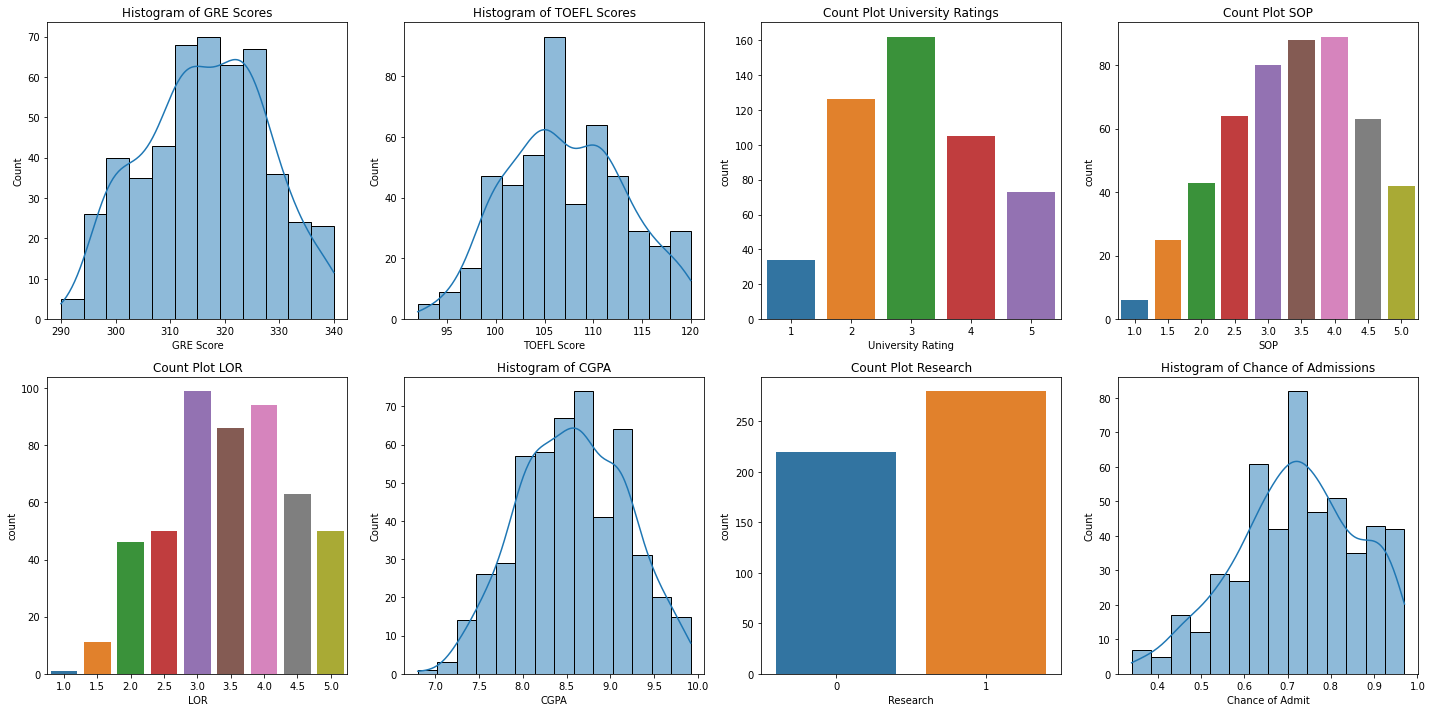

In [13]:
# 2x4 grid
fig, axes = plt.subplots(2, 4, figsize = (20, 10))

# flatten the axes for easy indexing
axes = axes.flatten()

# Plot 0: Histogram of GRE scores
plot0 = sns.histplot(df['GRE Score'], kde=True, ax=axes[0])
plot0.set_title("Histogram of GRE Scores")

# Plot 1: Histogram of TOEFL scores
plot1 = sns.histplot(df['TOEFL Score'], kde=True, ax=axes[1])
plot1.set_title("Histogram of TOEFL Scores")

# Plot2: Count Plot of University Rating
feature = df['University Rating'].astype('category')
plot2 = sns.countplot(x = feature, ax=axes[2])
plot2.set_title("Count Plot University Ratings")

# Plot3: Count Plot of SOP
feature = df['SOP'].astype('category')
plot3 = sns.countplot(x = feature, ax=axes[3])
plot3.set_title("Count Plot SOP")

# Plot4: Count Plot of LOR
feature = df['LOR'].astype('category')
plot4 = sns.countplot(x = feature, ax=axes[4])
plot4.set_title("Count Plot LOR")

# Plot5: Histogram of CGPA
plot5 = sns.histplot(x = df['CGPA'], kde=True, ax=axes[5])
plot5.set_title("Histogram of CGPA")

# Plot6: Count Plot of Research
feature = df['Research'].astype('category')
plot6 = sns.countplot(x = feature, ax=axes[6])
plot6.set_title("Count Plot Research")

# Plot 7: Histogram of Chance of Admit
plot7 = sns.histplot(df['Chance of Admit'], kde=True, ax=axes[7])
plot7.set_title("Histogram of Chance of Admissions")

# tight layout to avoid overlap
plt.tight_layout()
plt.show()

In [14]:
df['Research'].value_counts() # Reserach is a binary feature

1    280
0    220
Name: Research, dtype: int64

Observation:-

1. GRE scores, TOEFL scores, CGPA and Chance of Admit plot distributions are similar to Normal Distribution.
2. Similarly Distribution of Strength of SOP & LOR and University Rating is also similar to Normal Distribution.
3. 56% i.e., 280 out of 500 applicants have mention Research work in their application.

In [15]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


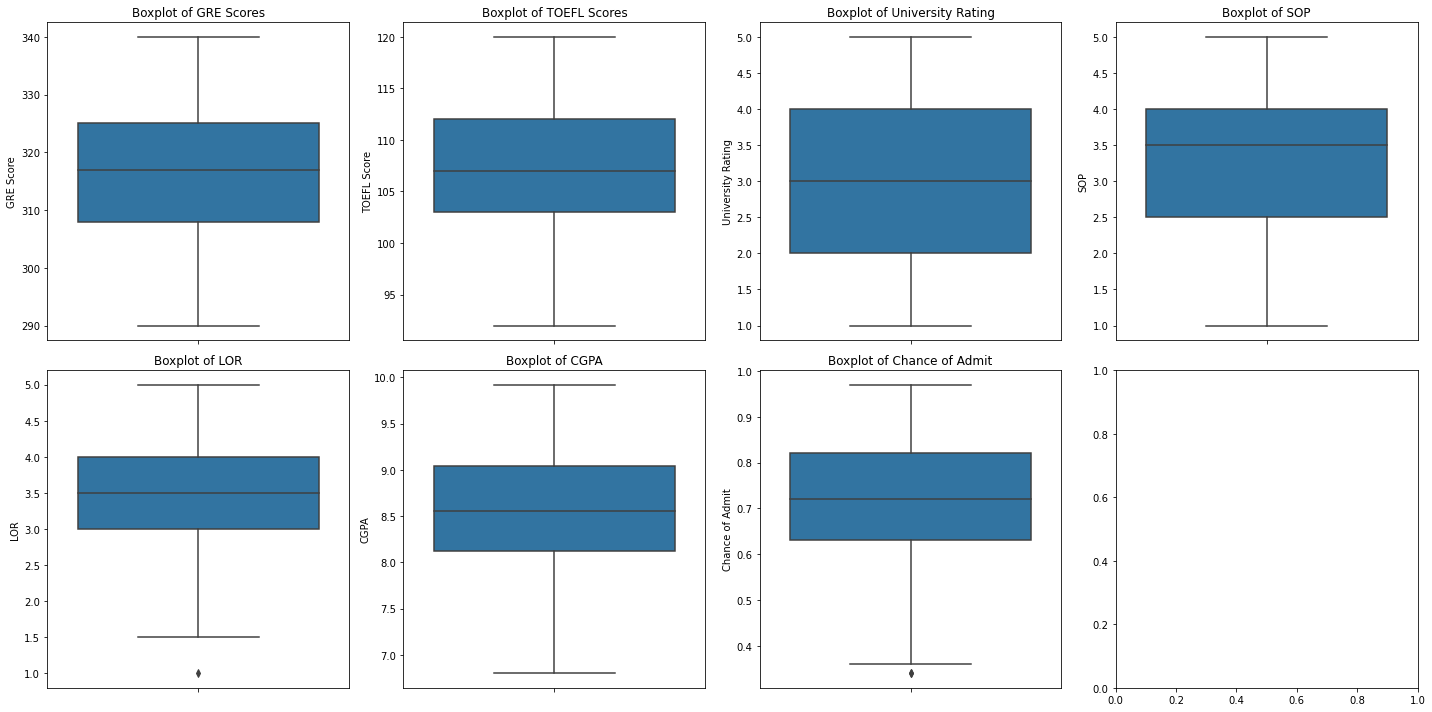

In [16]:
# 2x4 grid
fig, axes = plt.subplots(2, 4, figsize = (20, 10))

# flatten the axes for easy indexing
axes = axes.flatten()

# Plot 0: Boxplot of GRE scores
plot0 = sns.boxplot(y = df['GRE Score'], ax=axes[0])
plot0.set_title("Boxplot of GRE Scores")

# Plot 1: Boxplot of TOEFL scores
plot1 = sns.boxplot(y = df['TOEFL Score'], ax=axes[1])
plot1.set_title("Boxplot of TOEFL Scores")

# Plot2: Boxplot of University Rating
plot2 = sns.boxplot(y = df['University Rating'], ax=axes[2])
plot2.set_title("Boxplot of University Rating")

# Plot3: Boxplot of SOP
plot3 = sns.boxplot(y = df['SOP'], ax=axes[3])
plot3.set_title("Boxplot of SOP")

# Plot4: Boxplot of LOR
plot4 = sns.boxplot(y = df['LOR'], ax=axes[4])
plot4.set_title("Boxplot of LOR")

# Plot5: Boxplot of CGPA
plot5 = sns.boxplot(y = df['CGPA'], ax=axes[5])
plot5.set_title("Boxplot of CGPA")

# Plot 6: Boxplot of Chance of Admit
plot6 = sns.boxplot(y = df['Chance of Admit'], ax=axes[6])
plot6.set_title("Boxplot of Chance of Admit")

# tight layout to avoid overlap
plt.tight_layout()
plt.show()

- there are some individual outliers present in LOR and Chance of Admit

Checking overall outliers using IQR method

In [17]:
# outliers of LOR and chance of admit using IQR method
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

In [18]:
df_no_outliers = df[(df > q1 - 1.5*iqr) & (df < q3 + 1.5*iqr)]
df_no_outliers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [19]:
outliers_count = df.shape[0] - df_no_outliers.shape[0]
print("Overall Outliers: ", outliers_count)

Overall Outliers:  0


Observation:-

1. Some individual outliers are present in LOR and chance of Admit.
2. No Overall outliers.

**Data is outliers free.**

### Bivariate Analysis

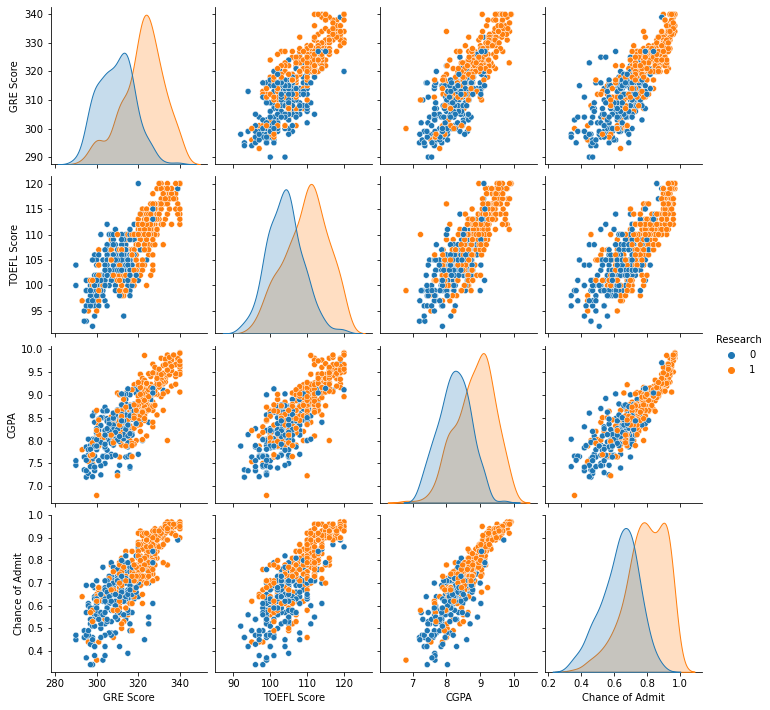

In [20]:
sns.pairplot(data=df[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit', 'Research']], hue='Research')
plt.show()

Observation:-

1. High co-relation appearing among **`['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']`**.
2. Applicants with Research work has high 'GRE Score', 'TOEFL Score', 'CGPA' and 'Chance of Admit', compared to those who don't done any Research work.
3. Linear Relationship can be seen in plots between `Chance of Admit` and other columns.

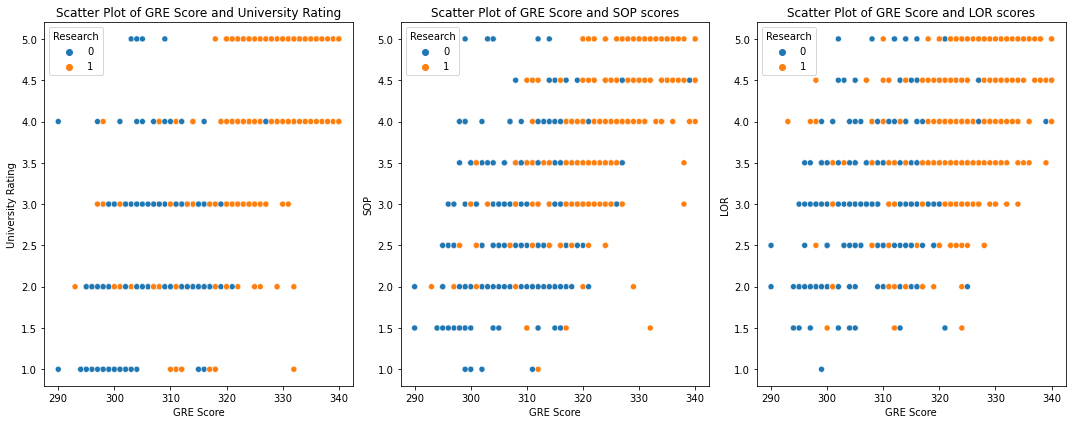

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6)) # 1x3 grid of subplots

axes = axes.flatten() # flattening for easy indexing

feature = "GRE Score"
# plot0
plot0 = sns.scatterplot(x = df[feature], y = df['University Rating'], hue=df['Research'], ax=axes[0])
plot0.set_title(f"Scatter Plot of {feature} and University Rating")

# plot1
plot1 = sns.scatterplot(x = df[feature], y = df['SOP'], hue=df['Research'], ax=axes[1])
plot1.set_title(f"Scatter Plot of {feature} and SOP scores")

# plot2
plot2 = sns.scatterplot(x = df[feature], y = df['LOR'], hue=df['Research'], ax=axes[2])
plot2.set_title(f"Scatter Plot of {feature} and LOR scores")

plt.tight_layout() # to avoid overlap
plt.show()

Observation:-

1. Applicants with high GRE scores have high strength of SOP and LOR compared to those with low GRE scores.
2. Applicants with high GRE scores have applied more in higher rated University compared to those with low GRE scores.

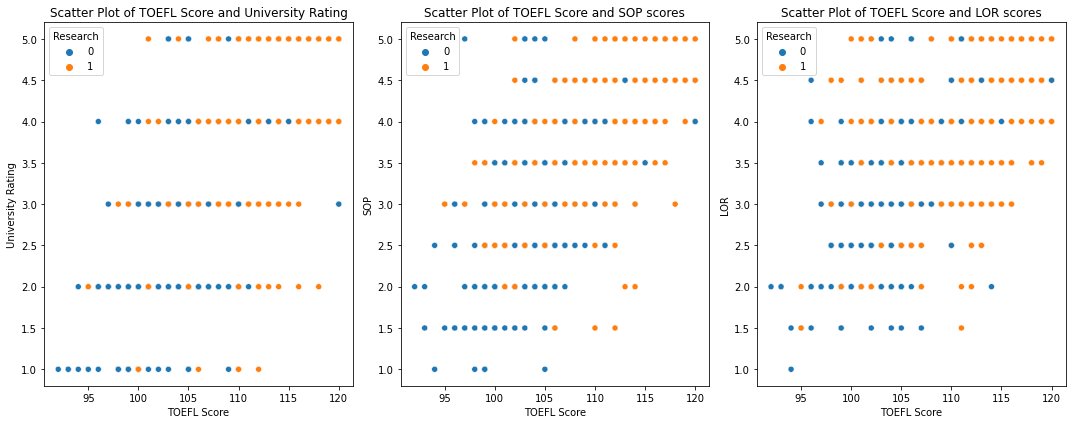

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6)) # 1x3 grid of subplots

axes = axes.flatten() # flattening for easy indexing

feature = "TOEFL Score"
# plot0
plot0 = sns.scatterplot(x = df[feature], y = df['University Rating'], hue=df['Research'], ax=axes[0])
plot0.set_title(f"Scatter Plot of {feature} and University Rating")

# plot1
plot1 = sns.scatterplot(x = df[feature], y = df['SOP'], hue=df['Research'], ax=axes[1])
plot1.set_title(f"Scatter Plot of {feature} and SOP scores")

# plot2
plot2 = sns.scatterplot(x = df[feature], y = df['LOR'], hue=df['Research'], ax=axes[2])
plot2.set_title(f"Scatter Plot of {feature} and LOR scores")

plt.tight_layout() # to avoid overlap
plt.show()

Observation:-

1. Applicants with high TOEFL scores have high strength of SOP and LOR compared to those with low TOEFL scores.
2. Applicants with high TOEFL scores have applied more in higher rated University compared to those with low TOEFL scores.

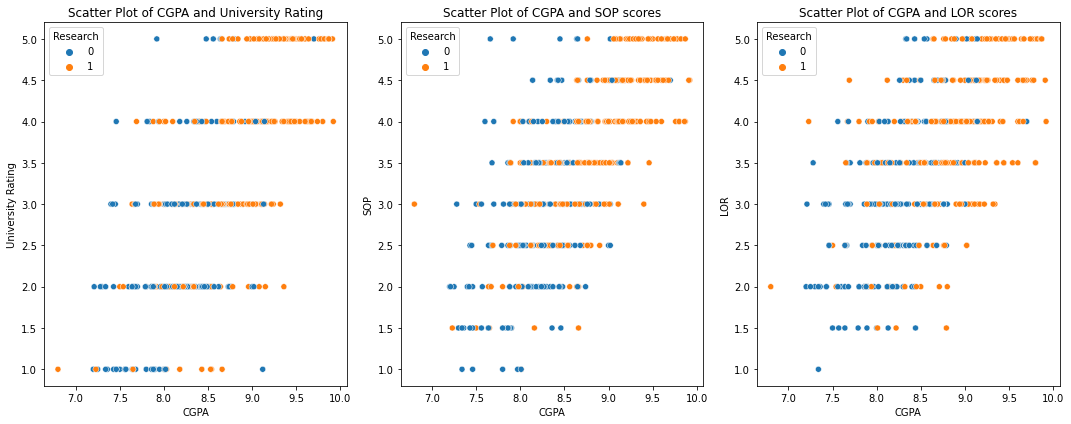

In [23]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6)) # 1x3 grid of subplots

axes = axes.flatten() # flattening for easy indexing

feature = "CGPA"
# plot0
plot0 = sns.scatterplot(x = df[feature], y = df['University Rating'], hue=df['Research'], ax=axes[0])
plot0.set_title(f"Scatter Plot of {feature} and University Rating")

# plot1
plot1 = sns.scatterplot(x = df[feature], y = df['SOP'], hue=df['Research'], ax=axes[1])
plot1.set_title(f"Scatter Plot of {feature} and SOP scores")

# plot2
plot2 = sns.scatterplot(x = df[feature], y = df['LOR'], hue=df['Research'], ax=axes[2])
plot2.set_title(f"Scatter Plot of {feature} and LOR scores")

plt.tight_layout() # to avoid overlap
plt.show()

Observation:-

1. Applicants with higher CGPA have high strength of SOP and LOR compared to those with lower CGPA.
2. Applicants with higher CGPA have applied more in higher rated University compared to those with lower CGPA.

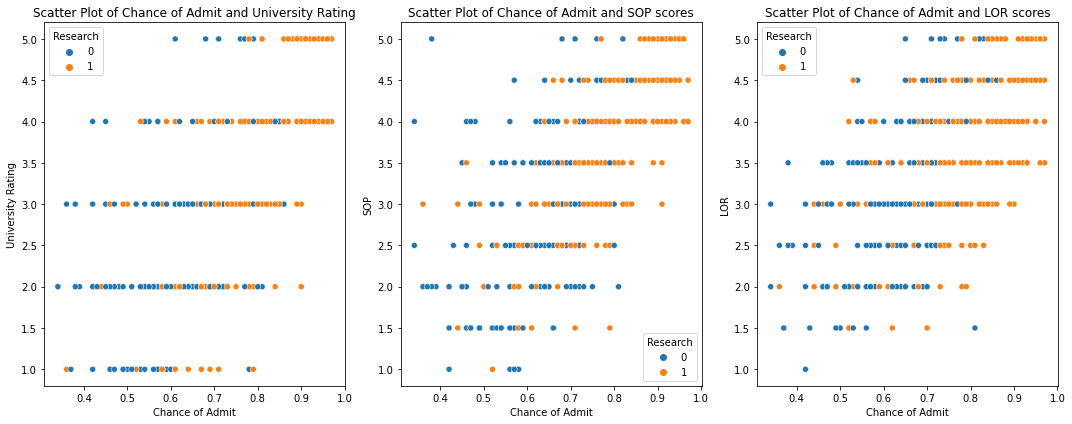

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6)) # 1x3 grid of subplots

axes = axes.flatten() # flattening for easy indexing

feature = "Chance of Admit"
# plot0
plot0 = sns.scatterplot(x = df[feature], y = df['University Rating'], hue=df['Research'], ax=axes[0])
plot0.set_title(f"Scatter Plot of {feature} and University Rating")

# plot1
plot1 = sns.scatterplot(x = df[feature], y = df['SOP'], hue=df['Research'], ax=axes[1])
plot1.set_title(f"Scatter Plot of {feature} and SOP scores")

# plot2
plot2 = sns.scatterplot(x = df[feature], y = df['LOR'], hue=df['Research'], ax=axes[2])
plot2.set_title(f"Scatter Plot of {feature} and LOR scores")

plt.tight_layout() # to avoid overlap
plt.show()

Observation:-

1. Applicants with higher chance of admissions have high strength of SOP and LOR compared to those with lower chance of admissions.
2. Applicants with higher chance of admissions have applied more in higher rated University compared to those with lower chance of admissions.

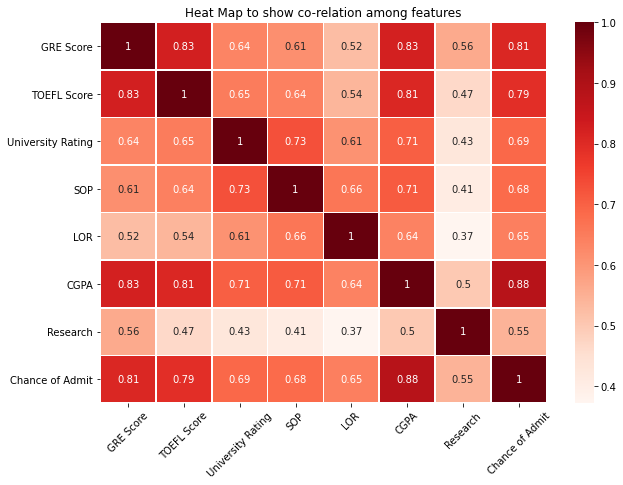

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="Reds")
plt.xticks(rotation = 45)
plt.title("Heat Map to show co-relation among features")
plt.show()

Observation:-

1. Besides (TOEFL Score vs Research), (University Rating vs Research), (SOP vs Research) and (LOR vs Research), all other pair have greater than or equals to 0.5 Co-relation score (meaning high co-relation).

# Implementing Linear Regression and verifying its assumptions

## Some Utility functions

In [26]:
def adj_R2(r2_value: float, m: int, d: int) -> float:
    return 1 - ( (1-r2_value)*(m-1) / (m-d-1))

In [27]:
def show_test_result(Ho: str, Ha: str, p_value: float, alpha: float) -> None:
    if p_value > alpha:
        print("Failed to reject Null Hypothesis")
        print(Ho)
    else:
        print("Reject Null Hypothesis")
        print(Ha)

In [28]:
def show_metrics_summary(y_true, y_pred, m: int, d:int) -> None:
    r2_value = r2_score(y_true, y_pred)
    adj_r2_value = adj_R2(r2_value, m, d)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print('R-square: ', r2_value)
    print('Adjusted R-square: ', adj_r2_value)
    print('Mean Absolute Error: ', mae)
    print('Mean Square Error: ', mse)
    print('Root Mean Square Error: ', rmse)
    

## Linear Regression using statsmodel

### Data split and Scaling

**X, y**

In [29]:
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

**train-test split**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle = True)

# Resetting indices to ensure alignment
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


**Scaling**

In [31]:
features = X_train.columns


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns=features)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.416963,0.307660,-0.059710,0.167470,0.069958,0.385758,0.872992
1,1.897564,1.625617,0.824884,0.167470,1.146239,1.454160,0.872992
2,0.155681,-0.021829,-0.059710,-0.336199,0.069958,-0.472201,0.872992
3,-0.366884,-0.021829,0.824884,1.174807,0.608098,0.142939,0.872992
4,1.287905,1.296128,1.709478,0.671138,0.069958,1.421785,0.872992


In [32]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features)

X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.374999,1.460872,1.709478,1.678475,1.684379,1.162778,0.872992
1,0.765340,1.131383,1.709478,0.671138,1.684379,1.454160,0.872992
2,0.852434,0.142916,-0.059710,-0.336199,0.069958,0.531449,-1.145486
3,0.678246,0.637150,1.709478,1.174807,0.608098,0.968523,0.872992
4,-1.150732,-0.351318,1.709478,1.678475,1.146239,0.142939,-1.145486


### Implementing Linear Regression

In [33]:
# add constant/bias
X_train = sm.add_constant(X_train)
sm_model = sm.OLS(y_train.values, X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     265.1
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          2.29e-144
Time:                        19:44:21   Log-Likelihood:                 559.41
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7184      0.00

R-square and adjusted R-sqaure for Training are 0.826 and 0.82 respectively.

### Multi-collinearity check / Removing collinearity using VIF 

In [34]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# round the VIF and sort the vif dataframe
vif['VIF'] = np.round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,Features,VIF
6,CGPA,4.86
1,GRE Score,4.46
2,TOEFL Score,4.02
4,SOP,2.85
3,University Rating,2.53
5,LOR,2.00
7,Research,1.51
0,const,1.00


- For all features VIF is less than 5, so all features are important.

### Different metrics result on test data.

In [35]:
X_test = sm.add_constant(X_test)
y_test_hat = sm_model.predict(X_test)

In [36]:
# Different metics score
m, d = X_test.shape
show_metrics_summary(y_test, y_test_hat, m, d)

R-square:  0.7970912596375869
Adjusted R-square:  0.7792531286167154
Mean Absolute Error:  0.04066666398242635
Mean Square Error:  0.003506869730596183
Root Mean Square Error:  0.05921882918967736


- R2: 0.797
- Adjusted R2: 0.779
- MAE: 0.04
- MSE: 0.003
- RMSE: 0.059

### Verifying Assumptions of Linear Regression

#### 1. Assumptions of Linearity:

From EDA section, it is evident that Chance of Admit is linearly dependent on all features.

#### 2. No Multi-collinear features:

I have checked and verified that VIF scores for all features is less than 5. So, there is no collinearity present.

#### 3. Errors are normally distributed

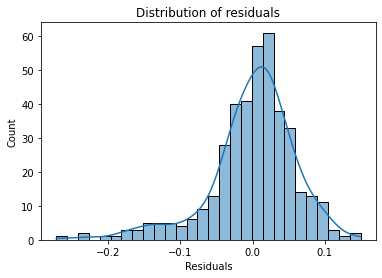

In [37]:
y_train_hat = sm_model.predict(X_train)
errors = y_train - y_train_hat

sns.histplot(errors, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of residuals")
plt.show()

Error Distribution is left skewed.

In [38]:
Ho = "Errors are Nomrally Distributed"
Ha = "Errors are not Normally Distributed"

test_stat, p_value = stats.shapiro(errors)
alpha = 0.05

show_test_result(Ho, Ha, p_value, alpha)

Reject Null Hypothesis
Errors are not Normally Distributed


Errors are not Normally Distributed

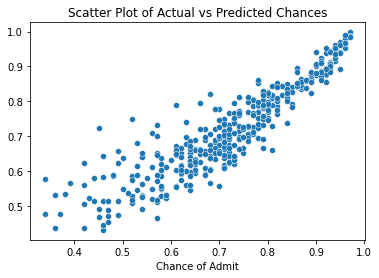

In [39]:
sns.scatterplot(x = y_train, y = y_train_hat)
plt.title("Scatter Plot of Actual vs Predicted Chances")
plt.show()

1. For higher value of admission chances, Variance among data-points is minimal. This ensure more confidence in predictions.
2. High variance/spread is noticed in data-points with lower value of admission chances. This indicates that more data is required related to less chance of admissions to train the model.

#### 4. No Heteroscedasticity

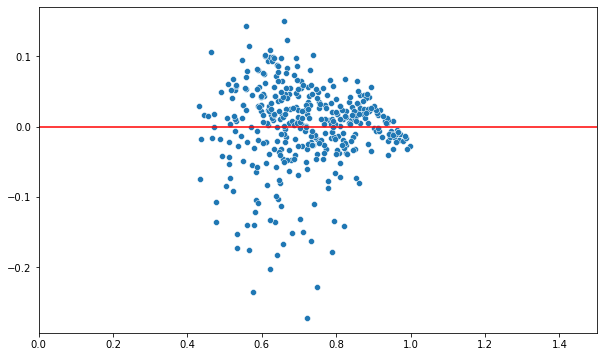

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_train_hat, y = errors)
plt.plot([0, 2], [0, 0], color = "red")
plt.xlim(0, 1.5)
plt.show()

- It seems to be data slightly Heteroscedastic.

In [41]:
# Perform Goldfeld-Quandt test
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test_stat, p_value, _ = test_result = sms.het_goldfeldquandt(errors, X_train)
test_result

(1.0420288685656884, 0.387879343879388, 'increasing')

In [42]:
Ho = "Homoscedasticity"
Ha = "Heteroscedasticity"
alpha = 0.05

show_test_result(Ho, Ha, p_value, alpha)

Failed to reject Null Hypothesis
Homoscedasticity


- No Heteroscedasticity.

# Linear Regression using sklearn

### Data split and Scaling

**train-test split**

In [43]:
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle = True)

# Resetting indices to ensure alignment
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


**Scaling**

In [45]:
features = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns=features)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.416963,0.307660,-0.059710,0.167470,0.069958,0.385758,0.872992
1,1.897564,1.625617,0.824884,0.167470,1.146239,1.454160,0.872992
2,0.155681,-0.021829,-0.059710,-0.336199,0.069958,-0.472201,0.872992
3,-0.366884,-0.021829,0.824884,1.174807,0.608098,0.142939,0.872992
4,1.287905,1.296128,1.709478,0.671138,0.069958,1.421785,0.872992


In [46]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features)

X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.374999,1.460872,1.709478,1.678475,1.684379,1.162778,0.872992
1,0.765340,1.131383,1.709478,0.671138,1.684379,1.454160,0.872992
2,0.852434,0.142916,-0.059710,-0.336199,0.069958,0.531449,-1.145486
3,0.678246,0.637150,1.709478,1.174807,0.608098,0.968523,0.872992
4,-1.150732,-0.351318,1.709478,1.678475,1.146239,0.142939,-1.145486


### Linear Regression Implementation without Regularization

In [47]:
# LR initialization
lr_model = LinearRegression()

# train/fit
lr_model.fit(X_train, y_train)

# predictions
y_test_hat = lr_model.predict(X_test)

# Different metics score
m, d = X_test.shape
show_metrics_summary(y_test, y_test_hat, m, d)

R-square:  0.797091259637587
Adjusted R-square:  0.7816525511317512
Mean Absolute Error:  0.040666663982426396
Mean Square Error:  0.0035068697305961805
Root Mean Square Error:  0.05921882918967734


- R2: 0.797
- Adjusted R2: 0.781
- MAE: 0.04
- MSE: 0.003
- RMSE: 0.059

### Ridge Linear Regression

In [48]:
# LR initialization
lr_model = Ridge(alpha=0.1)

# train/fit
lr_model.fit(X_train, y_train)

# predictions
y_test_hat = lr_model.predict(X_test)

# Different metics score
m, d = X_test.shape
show_metrics_summary(y_test, y_test_hat, m, d)

R-square:  0.797093686001114
Adjusted R-square:  0.7816551621098944
Mean Absolute Error:  0.040665171040671716
Mean Square Error:  0.003506827795779609
Root Mean Square Error:  0.05921847512203948


- R2: 0.797
- Adjusted R2: 0.781
- MAE: 0.04
- MSE: 0.003
- RMSE: 0.059

### Lasso Linear Regression

In [49]:
# LR initialization
lr_model = Lasso(alpha=0.001)

# train/fit
lr_model.fit(X_train, y_train)

# predictions
y_test_hat = lr_model.predict(X_test)

# Different metics score
m, d = X_test.shape
show_metrics_summary(y_test, y_test_hat, m, d)

R-square:  0.7967528459595132
Adjusted R-square:  0.7812883885868676
Mean Absolute Error:  0.040819335340372936
Mean Square Error:  0.0035127185308101937
Root Mean Square Error:  0.059268191560146274


- R2: 0.796
- Adjusted R2: 0.781
- MAE: 0.04
- MSE: 0.003
- RMSE: 0.059

# Insights of Summary and Recommendations

## Summarizing Insights

### Exploratory Data Analysis (EDA) Insights

1. **Dataset Overview**:
   - **Rows/Samples**: 500
   - **Columns**: 8 (7 features and 1 target)
   - **No Missing Values or Duplicates**
   - **All Numeric Columns** (No encoding required)

2. **Distributions**:
   - GRE scores, TOEFL scores, CGPA, and the Chance of Admit follow a near-normal distribution.
   - SOP, LOR, and University Rating also exhibit a normal-like distribution.
   - **Research Work**: 56% (280 out of 500 applicants) mentioned research experience in their applications.

3. **Outliers**:
   - Some outliers exist in LOR and Chance of Admit, but overall, the dataset is outlier-free.

4. **Correlations**:
   - High correlation among GRE Score, TOEFL Score, CGPA, and Chance of Admit.
   - Applicants with research experience tend to have higher scores in GRE, TOEFL, CGPA, and higher chances of admission.
   - Strong linear relationships observed between the Chance of Admit and other features.

5. **Group Comparisons**:
   - Applicants with higher GRE, TOEFL scores, or CGPA generally have stronger SOP, LOR, and apply to higher-rated universities.
   - Similar patterns are seen in applicants with a higher chance of admission.

6. **Correlation Scores**:
   - Most feature pairs have a correlation score of ≥ 0.5, except for TOEFL Score vs Research, University Rating vs Research, SOP vs Research, and LOR vs Research.

### Linear Regression Insights

1. **Model Performance (Statsmodels)**:
   - **Training R²**: 0.826, **Adjusted R²**: 0.82
   - **Test R²**: 0.797, **Adjusted R²**: 0.779
   - **MAE**: 0.04, **MSE**: 0.003, **RMSE**: 0.059

2. **Assumptions of Linear Regression**:
   - **Linearity**: The target variable is linearly dependent on all features.
   - **No Multicollinearity**: VIF scores for all features are < 5, indicating no multicollinearity.
   - **Error Distribution**:
     - Errors are left-skewed and not normally distributed.
     - Minimal variance in high admission chances but high variance in low admission chances, suggesting the need for more data in the latter.
   - **Homoscedasticity**:
     - Initially appeared heteroscedastic but confirmed to be homoscedastic via the Goldfeld-Quandt test.

### sklearn Linear Regression Models

- **Linear Regression (without Regularization)**:
  - R²: 0.797, Adjusted R²: 0.781, MAE: 0.04, MSE: 0.003, RMSE: 0.059

- **Ridge Linear Regression (L2-Regularization)**:
  - Similar results to the non-regularized model, indicating minimal improvement with regularization.

- **Lasso Linear Regression (L1-Regularization)**:
  - Similar results to the non-regularized model, indicating minimal improvement with regularization.

### Conclusion
This analysis highlights the importance of GRE, TOEFL, CGPA, and research experience in predicting the chances of admission, with strong linear relationships and minimal multicollinearity present in the data.


## Actionable Recommendations

### 1. Focus on High-Impact Features
- **GRE Score, TOEFL Score, and CGPA**: These factors are highly correlated with the chance of admission. Encourage students to prioritize improving their scores in these areas as they significantly impact admission chances.
- **Research Experience**: Since applicants with research experience tend to have higher scores and better admission chances, Jamboree could emphasize the importance of research and potentially offer guidance or opportunities to help students gain research experience.

### 2. Tailored Student Support
- **Targeted Training for Lower-Scoring Students**: The analysis shows higher variance in admission chances among applicants with lower scores. Jamboree could develop specialized programs or resources aimed at boosting the GRE, TOEFL, and CGPA scores of these students, increasing their chances of admission.
- **Enhanced SOP and LOR Preparation**: Students with higher scores tend to have stronger SOPs and LORs. Jamboree could offer workshops or personalized coaching to help all students, especially those with lower scores, craft compelling SOPs and secure strong LORs.

### 3. Data-Driven Decision Making
- **Focus on Data Collection**: The analysis identified a need for more data, particularly for applicants with lower chances of admission. Jamboree should consider collecting more detailed data from these applicants to refine the predictive model and provide more accurate predictions.
- **Continuous Model Improvement**: Regularly update the predictive model as more data becomes available to ensure its accuracy and reliability. This will help keep the admission probability feature relevant and valuable to students.

### 4. Targeted University Applications
- **Strategic University Selection**: The analysis shows that students with higher scores tend to apply to higher-rated universities. Jamboree could offer tailored advice on university selection, guiding students to apply to institutions that match their profiles, thereby optimizing their chances of admission.


## Comments on Performance Measures and Model Improvement

### Model Performance
- The model explains around 80% of the variance in the chance of admission, with low errors (MAE: 0.04, MSE: 0.003, RMSE: 0.059), indicating strong predictive ability.
- The assumptions of linearity and no multicollinearity are met, adding to the reliability of the model.

### Potential Areas for Improvement
- **Error Distribution**: The skewness in error distribution suggests the model may not fully capture the variability for all ranges of the target variable, particularly for lower chances of admission. Collecting more data in this range could help improve model performance.
- **Feature Engineering**: Creating new features or interactions between existing features could help explain more variance in the target variable, potentially improving model accuracy.

### Conclusion
- The current model is adequate and performs well. However, improvements could be made by addressing error distribution skewness and exploring more advanced modeling techniques.
